<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

#Этапы работы:
**1. Преобразуйте данные:    
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;    
b. закодируйте категориальные переменные числовыми значениями по необходимости.**

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
data = pd.read_csv('https://raw.githubusercontent.com/adtitovich/dsml-17/main/datasets/athletes.csv')
data.head(20)
     

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [53]:
# удалим признаки, которые не будем использовать
data = data.drop(columns=['id', 'name'])

In [54]:
# Обработаем пропущенные значения

# удалим пропущенное значение в dob
data = data.drop(data[data['dob'].isnull()].index)

In [55]:
# заполним пропущенные значения height и weight средними значениями для каждого пола

male = data['sex'] == 'male'
female = data['sex'] == 'female'

data.loc[male, 'height'] = data.loc[male, 'height'].fillna(data.loc[male, 'height'].mean())
data.loc[female, 'height'] = data.loc[female, 'height'].fillna(data.loc[female, 'height'].mean())
data.loc[male, 'weight'] = data.loc[male, 'weight'].fillna(data.loc[male, 'weight'].mean())
data.loc[female, 'weight'] = data.loc[female, 'weight'].fillna(data.loc[female, 'weight'].mean())

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nationality  11537 non-null  object 
 1   sex          11537 non-null  object 
 2   dob          11537 non-null  object 
 3   height       11537 non-null  float64
 4   weight       11537 non-null  float64
 5   sport        11537 non-null  object 
 6   gold         11537 non-null  int64  
 7   silver       11537 non-null  int64  
 8   bronze       11537 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 901.3+ KB


In [57]:
# Закодируем категориальные переменные

#sex
le = LabelEncoder()
data.isetitem(1, le.fit_transform(data['sex']))


# dob
data['dob'] = pd.to_datetime(data['dob'], format = '%m/%d/%y')
data["dob"] = data['dob'].apply(lambda x: x - dt.timedelta(days=365*100) if x > dt.datetime.now() else x)
data['dob']= data['dob'].map(dt.datetime.toordinal)


# nationality, sport
data = pd.get_dummies(data, columns = ['nationality', 'sport'])

**2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.**

In [60]:
X = data.drop(columns=['sex'])
y = data['sex']

In [69]:
# делим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [70]:
# обучаем модель
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

**3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.**

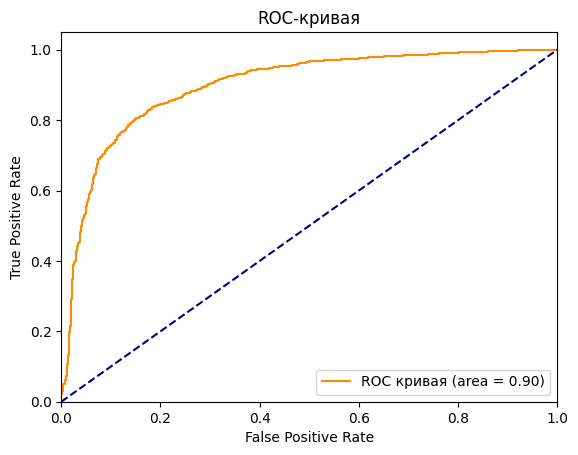

In [86]:
# предсказания
predictions = model.predict_proba(X_test)

# # рассчитываем roc-кривую
fpr, tpr, treshold = metrics.roc_curve(y_test, predictions[:, 1])
roc_auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()





**4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [74]:
# рассчитываем ROC AUC
lr_auc = metrics.roc_auc_score(y_test, predictions[:, 1])

print(lr_auc)

0.8966518745334036


**5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [82]:
def get_metrics(y, proba, threshold):
  tp = 0
  fp = 0
  fn = 0
  tn = 0
  for predicted_prob, actual in zip(proba, y):    
    if predicted_prob >= threshold:
      predicted = 1
    else:
      predicted = 0
    if predicted == 1:
      if actual == 1:
        tp += 1
      else:
        fp += 1
    else:
      if actual == 1:
        fn += 1
      else:
        tn += 1
  return fp, tp, fn, tn 

In [88]:
# пороговые значения  
thresholds = np.linspace(0,1,100)

# массивы метрик
tpr_m = []
fpr_m = []
fnr_m = []
tnr_m = []

In [89]:
# перебираем пороговые значения и получаем количество ложно и истинно положительных результатов 
for th in thresholds:
  fp, tp, fn, tn = get_metrics(y_test, predictions[:, 1], th)	
  fpr_m.append(fp/(fp + tn))
  tpr_m.append(tp/(tp + fn))

**6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.**

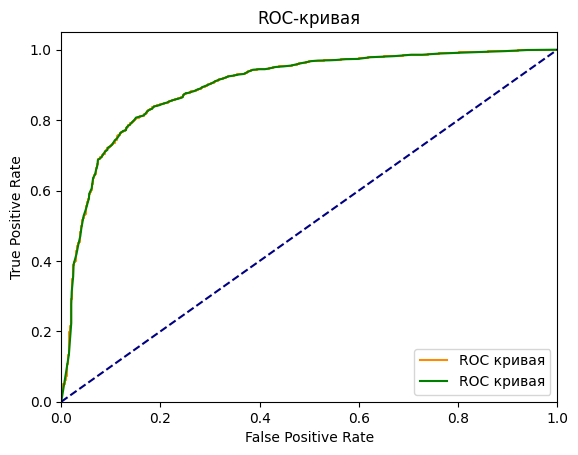

In [90]:
plt.plot(fpr, tpr, color='darkorange', label='ROC кривая')
plt.plot(fpr_m, tpr_m, color='green', label='ROC кривая')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

**7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.**

**8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.**

**9. Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?**